In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE

In [34]:
#LOADING DATA
df=pd.read_csv('/content/drive/MyDrive/datasets_parkinsons.csv')

In [35]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [36]:
#Null Counts
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [37]:
#Finding Class Balance
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [38]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [39]:
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [40]:
x=df.drop(columns=['name','status'], axis=1)
y=df['status']

In [41]:
# Get unique values of 'status'
unique_status_values = df['status'].unique()

# Iterate through unique 'status' values and calculate the mean for each
for status_value in unique_status_values:
    status_mean = df[df['status'] == status_value].mean()
    for column, mean_value in status_mean.iteritems():
        print(f"The Mean value of {column} for status {status_value} = {mean_value}")


The Mean value of MDVP:Fo(Hz) for status 1 = 145.1807619047619
The Mean value of MDVP:Fhi(Hz) for status 1 = 188.44146258503403
The Mean value of MDVP:Flo(Hz) for status 1 = 106.89355782312924
The Mean value of MDVP:Jitter(%) for status 1 = 0.006989251700680272
The Mean value of MDVP:Jitter(Abs) for status 1 = 5.068027210884354e-05
The Mean value of MDVP:RAP for status 1 = 0.0037574829931972796
The Mean value of MDVP:PPQ for status 1 = 0.003900340136054422
The Mean value of Jitter:DDP for status 1 = 0.011273061224489796
The Mean value of MDVP:Shimmer for status 1 = 0.03365816326530613
The Mean value of MDVP:Shimmer(dB) for status 1 = 0.32120408163265307
The Mean value of Shimmer:APQ3 for status 1 = 0.01767578231292517
The Mean value of Shimmer:APQ5 for status 1 = 0.020284693877551024
The Mean value of MDVP:APQ for status 1 = 0.0276004081632653
The Mean value of Shimmer:DDA for status 1 = 0.05302727891156462
The Mean value of NHR for status 1 = 0.029210952380952383
The Mean value of HNR

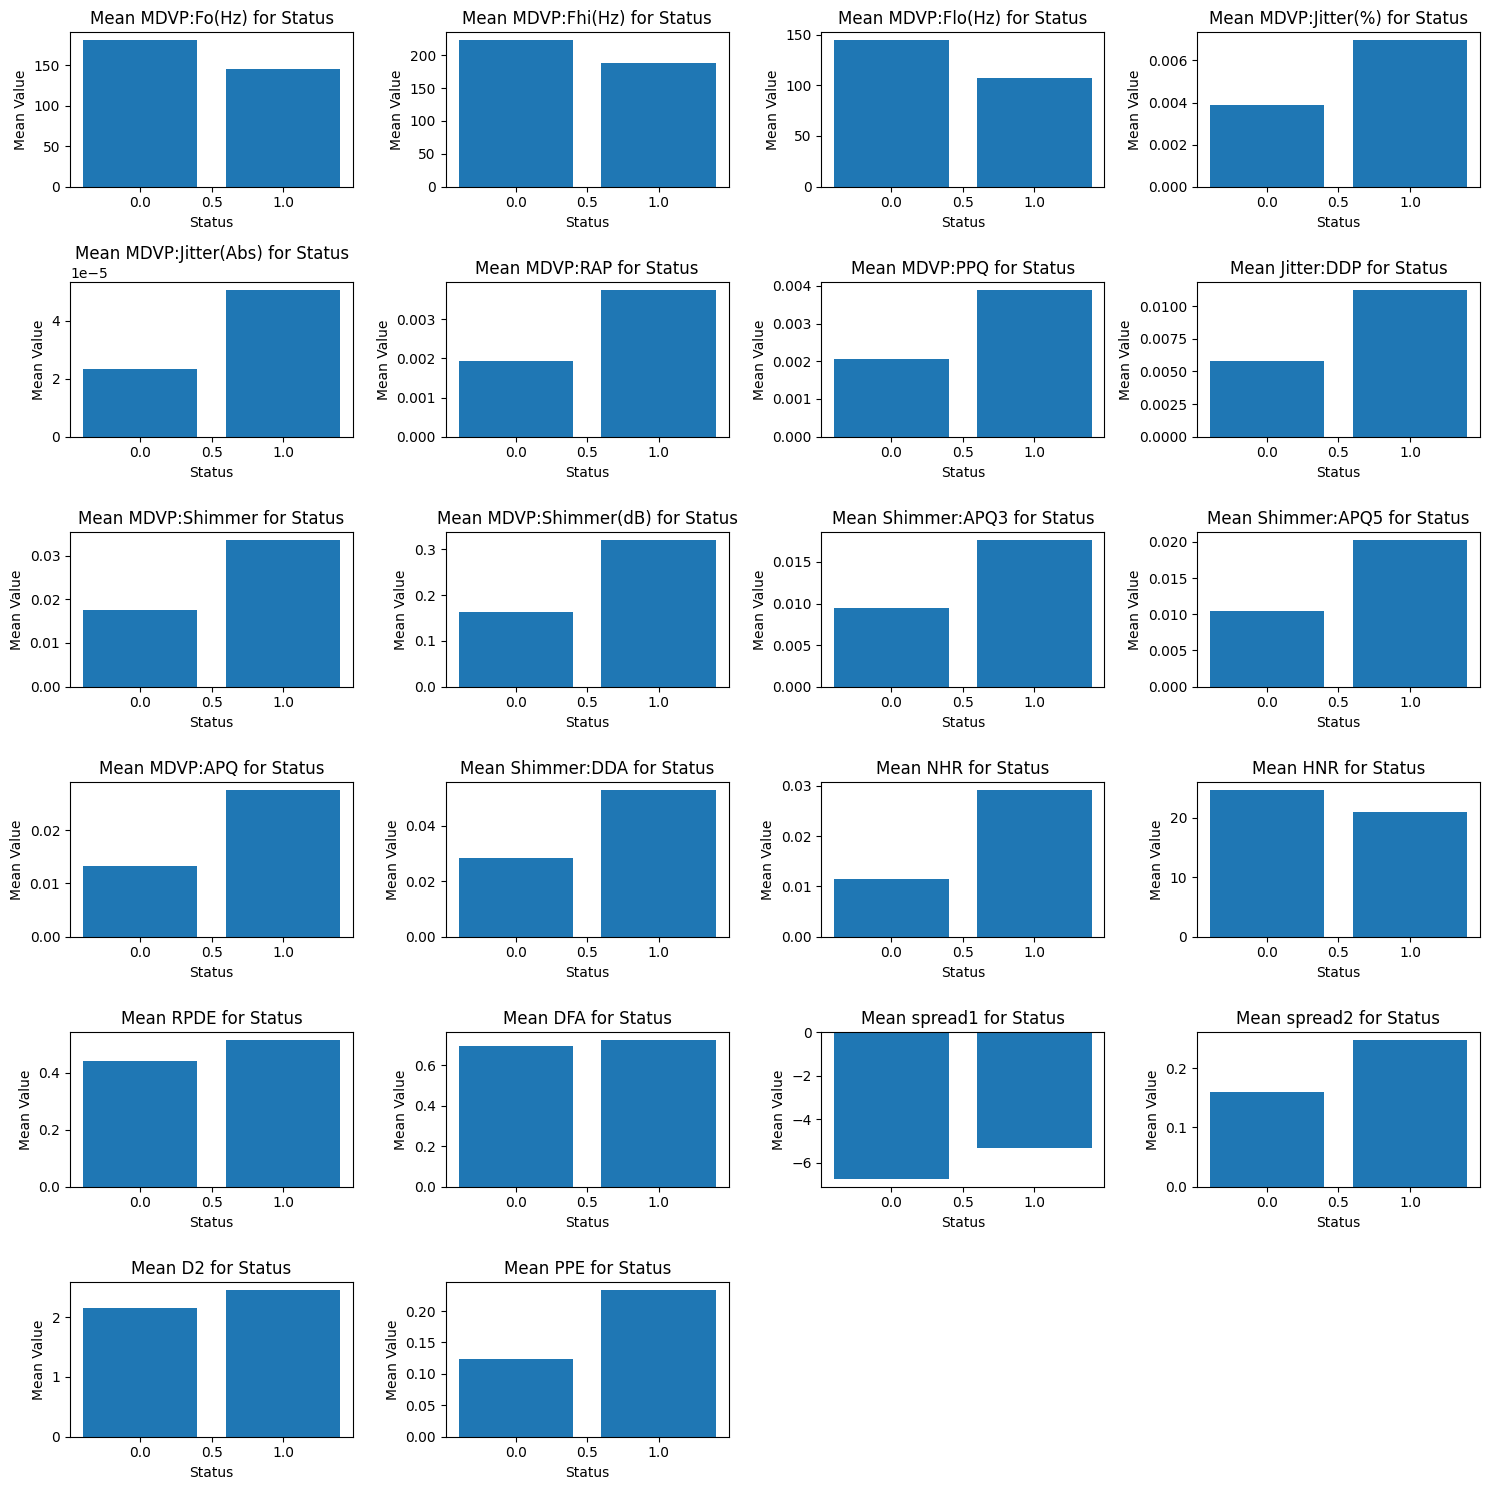

In [42]:
# Group by 'status' and calculate the mean for each column
grouped = df.groupby('status').mean()

# Get the list of column names to create subplots
columns = grouped.columns

# Calculate the number of rows and columns for subplots
num_cols = 4  # Number of columns in the grid
num_rows = (len(columns) + num_cols - 1) // num_cols  # Calculate the number of rows

# Create a figure with subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten axs if it's a single-row subplot array
if num_rows == 1:
    axs = [axs]

# Iterate through columns and create separate bar graphs
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    axs[row][col].bar(grouped.index, grouped[column])
    axs[row][col].set_title(f"Mean {column} for Status")
    axs[row][col].set_ylabel("Mean Value")
    axs[row][col].set_xlabel("Status")

# Remove any empty subplots if the number of columns is not a multiple of num_cols
for i in range(len(columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axs[row][col])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



In [43]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [44]:
#TO BALANCE THE TARGET

In [45]:
smote = SMOTE()
X,Y = smote.fit_resample(x,y)

In [46]:
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
X.columns = x.columns

In [47]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,...,0.029710,0.065450,0.022110,21.033000,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,...,0.043680,0.094030,0.019290,19.085000,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,0.482000,...,0.035900,0.082700,0.013090,20.651000,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,0.517000,...,0.037720,0.087710,0.013530,20.644000,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,...,0.044650,0.104700,0.017670,19.649000,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,232.259635,242.920459,101.070784,0.002730,0.000010,0.001540,0.001524,0.004617,0.022816,0.201036,...,0.015347,0.038651,0.005221,24.710423,0.463190,0.646048,-6.962745,0.145899,2.261711,0.113175
290,116.720928,157.407281,98.763903,0.003376,0.000030,0.001594,0.002077,0.004787,0.016203,0.141452,...,0.014651,0.023899,0.006480,24.953764,0.470682,0.716209,-5.846984,0.191694,1.946163,0.183315
291,220.609801,245.449999,92.382839,0.003560,0.000016,0.001968,0.002014,0.005897,0.018993,0.172589,...,0.013500,0.030508,0.015447,24.641705,0.452479,0.679614,-6.817274,0.118033,2.392570,0.113738
292,253.400341,261.077607,233.653191,0.002947,0.000010,0.001708,0.001677,0.005126,0.018217,0.172518,...,0.012298,0.031626,0.007413,22.617614,0.437217,0.632282,-7.315036,0.137746,2.069866,0.086126


In [48]:
Y.value_counts()

status
0         147
1         147
dtype: int64

In [49]:
#SPLITTING

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((220, 22), (74, 22), (220, 1), (74, 1))

In [51]:
#STANDARDISING

In [52]:
scaler=StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [53]:
#Models

SVM

In [55]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt


In [56]:
model1 = svm.SVC(kernel='linear')
model1.fit(x_train, Y_train)

SVC(kernel='linear')

In [57]:

Y_pred_svm = model1.predict(x_test)
SVMScore = model1.score(x_test, Y_test)
CM_SVM=metrics.confusion_matrix(Y_test,Y_pred_svm)
print("Confusion Matrix for SVM: ")
print(CM_SVM)
print("Accuracy obtained by SVM model:",SVMScore*100)
print(metrics.classification_report(Y_test, Y_pred_svm))

Confusion Matrix for SVM: 
[[34  2]
 [ 5 33]]
Accuracy obtained by SVM model: 90.54054054054053
              precision    recall  f1-score   support

           0       0.87      0.94      0.91        36
           1       0.94      0.87      0.90        38

    accuracy                           0.91        74
   macro avg       0.91      0.91      0.91        74
weighted avg       0.91      0.91      0.91        74



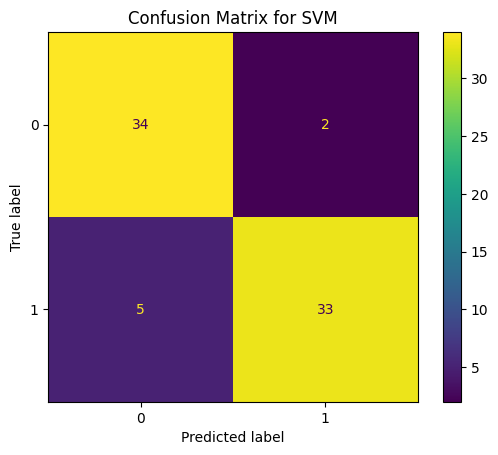

In [59]:
# Plotting the confusion matrix
cm_svm = metrics.confusion_matrix(Y_test, Y_pred_svm)
cm_svm = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_svm)
cm_svm.plot()
plt.title('Confusion Matrix for SVM')
plt.show()

Logistic Regression

In [60]:

model2 = LogisticRegression()
model2.fit(x_train, Y_train)

Y_pred_LR = model2.predict(x_test)
LRScore = model2.score(x_test, Y_test)
CM_LR=metrics.confusion_matrix(Y_test,Y_pred_LR)
print("Confusion Matrix for LR: ")
print(CM_LR)
print("Accuracy obtained by Logistic Regression model:",LRScore*100)
print(metrics.classification_report(Y_test, Y_pred_LR))

Confusion Matrix for LR: 
[[33  3]
 [ 4 34]]
Accuracy obtained by Logistic Regression model: 90.54054054054053
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.92      0.89      0.91        38

    accuracy                           0.91        74
   macro avg       0.91      0.91      0.91        74
weighted avg       0.91      0.91      0.91        74



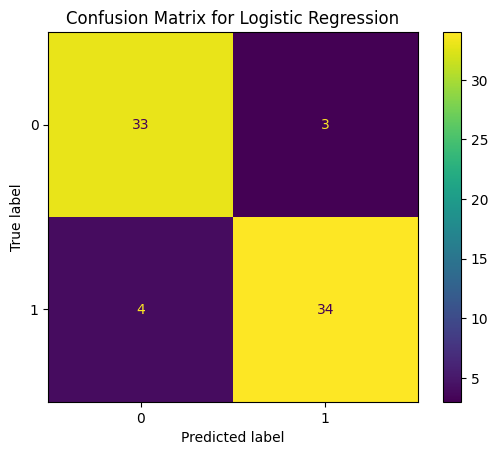

In [61]:
# Plotting the confusion matrix
cm_lr = metrics.confusion_matrix(Y_test, Y_pred_LR)
cm_lr = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_lr)
cm_lr.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(x_train, Y_train)

Y_pred_DT = model3.predict(x_test)
DTScore = model3.score(x_test, Y_test)

CM_DT=metrics.confusion_matrix(Y_test,Y_pred_DT)
print("Confusion Matrix for DT: ")
print(CM_DT)
print("Accuracy obtained by Decision Tree model:",DTScore*100)
print(metrics.classification_report(Y_test, Y_pred_DT))

Confusion Matrix for DT: 
[[36  0]
 [ 3 35]]
Accuracy obtained by Decision Tree model: 95.94594594594594
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        36
           1       1.00      0.92      0.96        38

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74



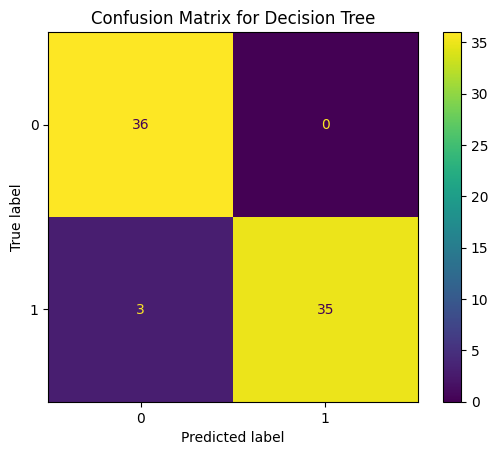

In [63]:
# Plotting the confusion matrix
cm_dt = metrics.confusion_matrix(Y_test, Y_pred_DT)
cm_dt = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_dt)
cm_dt.plot()
plt.title('Confusion Matrix for Decision Tree')
plt.show()

Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
model4.fit(x_train, Y_train)

Y_pred_RF = model4.predict(x_test)
RFScore = model4.score(x_test, Y_test)

CM_RF=metrics.confusion_matrix(Y_test,Y_pred_RF)
print("Confusion Matrix for Random forest: ")
print(CM_RF)
print("Accuracy obtained by Random Forest model:",RFScore*100)
print(metrics.classification_report(Y_test, Y_pred_RF))

Confusion Matrix for Random forest: 
[[36  0]
 [ 1 37]]
Accuracy obtained by Random Forest model: 98.64864864864865
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.97      0.99        38

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



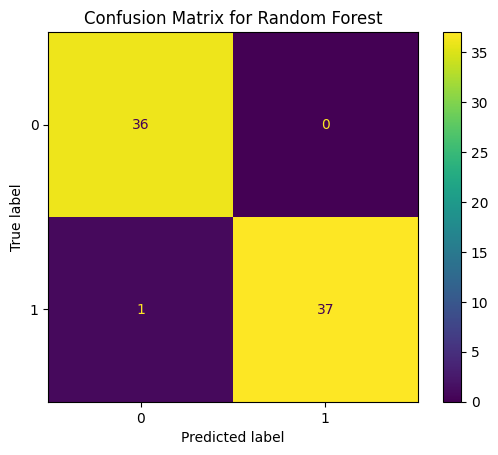

In [64]:
# Plotting the confusion matrix
cm_rf = metrics.confusion_matrix(Y_test, Y_pred_RF)
cm_rf = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_rf)
cm_rf.plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()